In [1]:
from quick_era5 import era5_downloader, era5_converter
import datetime
import matplotlib.pyplot as plt

In [ ]:
# 下載ERA5資料
# Download ERA5 data
variable_list = ['2m_temperature', 'u_component_of_wind', 'v_component_of_wind']
from_datetime = datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
to_datetime = datetime.datetime(2020, 1, 2, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
time_interval = 6
level_range = (500, 1000)
longitude_range = (180, 360)
latitude_range = (90, -90)
longitude_shift = True
xarr = era5_downloader.download_era5_data_from_gcs(variable_list, from_datetime, to_datetime, time_interval, level_range, latitude_range, longitude_range, longitude_shift)

xarr

In [ ]:
# 將xarray資料轉換成netcdf檔案
# Convert xarray data to netcdf file
era5_converter.era5_xarray_to_netcdf(xarr, 'output.nc')

In [ ]:
# Convert xarray data to numpy array
variable = 'u_component_of_wind'
z = 1000
time = datetime.datetime(2020, 1, 1)
save_at = "output.tif"
era5_converter.era5_xarray_to_geotiff(xarr, variable, z, time, save_at)

In [5]:
# 將xarray資料轉換成numpy array
# Convert xarray data to numpy array
variable = 'u_component_of_wind'
time = datetime.datetime(2020, 1, 1)
z = 1000
array = era5_converter.era5_xarray_to_nparray(xarr, variable, z, time)

array

array([[1.3794005e-04, 1.3794005e-04, 1.3794005e-04, ..., 1.3794005e-04,
        1.3794005e-04, 1.3794005e-04],
       [5.3027315e+00, 5.2951088e+00, 5.2874856e+00, ..., 5.3271255e+00,
        5.3195024e+00, 5.3118792e+00],
       [5.5283737e+00, 5.5253248e+00, 5.5215130e+00, ..., 5.5367594e+00,
        5.5344725e+00, 5.5314231e+00],
       ...,
       [5.8607388e+00, 5.8683619e+00, 5.8744602e+00, ..., 5.8393941e+00,
        5.8462553e+00, 5.8538780e+00],
       [5.3957329e+00, 5.4033561e+00, 5.4102168e+00, ..., 5.3736258e+00,
        5.3812490e+00, 5.3888721e+00],
       [1.3794005e-04, 1.3794005e-04, 1.3794005e-04, ..., 1.3794005e-04,
        1.3794005e-04, 1.3794005e-04]], dtype=float32)

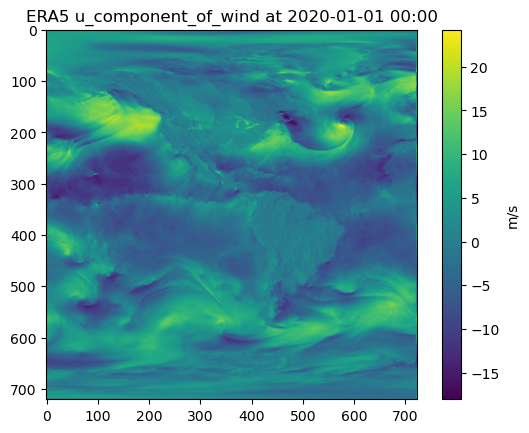

In [6]:
# 將numpy array繪製成圖
# Plot numpy array
plt.imshow(array)
plt.title("ERA5 u_component_of_wind at 2020-01-01 00:00")
plt.colorbar().set_label('m/s')
plt.show()